#### Data Wrangling & Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

C:\Users\shirl\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

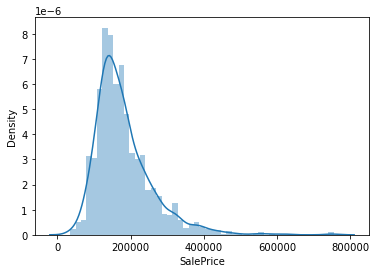

In [4]:
sns.distplot(train.SalePrice)

C:\Users\shirl\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

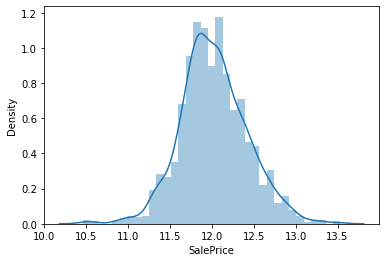

In [5]:
sns.distplot(np.log(train.SalePrice + 1))

<AxesSubplot:>

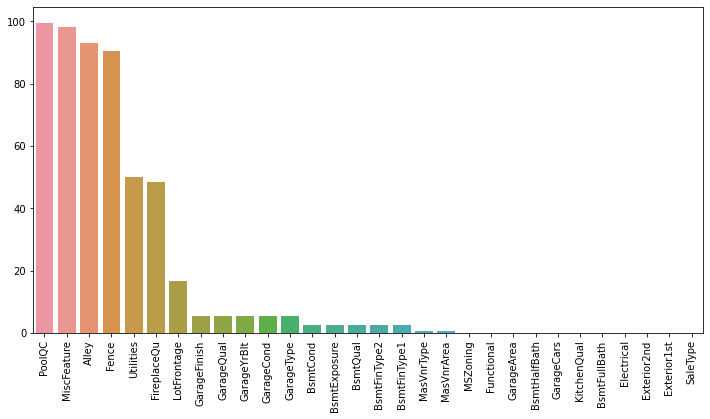

In [6]:
data = pd.concat((train.drop(["SalePrice"],axis=1),test))
data_na = (data.isnull().sum()/len(data))*100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
plt.figure(figsize=(12,6))
plt.xticks(rotation="90")
sns.barplot(x=data_na.index,y=data_na)

#### Feature Enginnering

In [7]:
y = train["SalePrice"]
y = np.log(y+1)

In [8]:
# PoolQC
data[data.PoolArea != 0][["PoolArea","PoolQC"]]

,PoolArea,PoolQC
197,512,Ex
810,648,Fa
1170,576,Gd
1182,555,Ex
1298,480,Gd
1386,519,Fa
1423,738,Gd
514,144,Ex
960,368,NaN
1043,444,NaN


In [9]:
test.loc[960,"PoolQC"] = "Fa"
test.loc[1043,"PoolQC"] = "Gd"
test.loc[1139,"PoolQC"] = "Fa"

In [10]:
# Garage
data[(data.GarageType.notnull()) & (data.GarageYrBlt.isnull())][["Neighborhood","YearBuilt","YearRemodAdd","GarageType","GarageYrBlt","GarageFinish","GarageCars","GarageArea","GarageQual","GarageCond"]]

,Neighborhood,YearBuilt,YearRemodAdd,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
666,OldTown,1910,1983,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
1116,IDOTRR,1923,1999,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
test.loc[666,"GarageYrBlt"] = 1979
test.loc[1116,"GarageYrBlt"] = 1979

test.loc[666,"GarageFinish"] = "Unf"
test.loc[1116,"GarageFinish"] = "Unf"

test.loc[1116,"GarageCars"] = 2
test.loc[1116,"GarageArea"] = 480

test.loc[666,"GarageQual"] = "TA"
test.loc[1116,"GarageQual"] = "TA"

test.loc[666,"GarageCond"] = "TA"
test.loc[1116,"GarageCond"] = "TA"

Filling Missing Data

In [12]:
# PoolQC
train = train.fillna({"PoolQC": "None"})
test = test.fillna({"PoolQC": "None"})
# Alley
train = train.fillna({"Alley": "None"})
test = test.fillna({"Alley": "None"})
# FireplaceQu
train = train.fillna({"FireplaceQu": "None"})
test = test.fillna({"FireplaceQu": "None"})
# LotFrontage
train = train.fillna({"LotFrontage": 0})
test = test.fillna({"LotFrontage": 0})
# Garage
train = train.fillna({"GarageType": "None"})
test = test.fillna({"GarageType": "None"})
train = train.fillna({"GarageFinish": "None"})
test = test.fillna({"GarageFinish": "None"})
train = train.fillna({"GarageYrBlt": 0})
test = test.fillna({"GarageYrBlt": 0})
test = test.fillna({"GarageCars": 0})
test = test.fillna({"GarageArea": 0})
train = train.fillna({"GarageQual": "None"})
test = test.fillna({"GarageQual": "None"})
train = train.fillna({"GarageCond": "None"})
test = test.fillna({"GarageCond": "None"})
# Bsmt
train = train.fillna({"BsmtQual": "None"})
test = test.fillna({"BsmtQual": "None"})
train = train.fillna({"BsmtCond": "None"})
test = test.fillna({"BsmtCond": "None"})
train = train.fillna({"BsmtExposure": "None"})
test = test.fillna({"BsmtExposure": "None"})
train = train.fillna({"BsmtFinType1": "None"})
test = test.fillna({"BsmtFinType1": "None"})
train = train.fillna({"BsmtFinType2": "None"})
test = test.fillna({"BsmtFinType2": "None"})
train = train.fillna({"BsmtFinSF1": 0})
test = test.fillna({"BsmtFinSF1": 0})
train = train.fillna({"BsmtFinSF2": 0})
test = test.fillna({"BsmtFinSF2": 0})
test = test.fillna({"BsmtUntSF": 0})
test = test.fillna({"TotalBsmtSF": 0})
test = test.fillna({"BsmtFullBath": 0})
test = test.fillna({"BsmtHalfBath": 0})
# MasVnr
train = train.fillna({"MasVnrType": "None"})
test = test.fillna({"MasVnrType": "None"})
train = train.fillna({"MasVnrArea": 0})
test = test.fillna({"MasVnrArea": 0})

#Other
test = test.fillna({"MSZoning":"RL"})
test = test.fillna({"Exterior1st":"VinylSd"})
test = test.fillna({"Exterior2nd":"VinylSd"})
train = train.fillna({"Electrical":"SBrkr"})
test = test.fillna({"KitchenQual":"TA"})
test = test.fillna({"Functional":"Typ"})
test = test.fillna({"SaleType":"WD"})

Explore Outliers

In [13]:
train_dummies = pd.get_dummies(pd.concat((train.drop(["SalePrice","Id"],axis=1),test.drop(["Id"],axis=1)),axis=0)).iloc[:train.shape[0]]
test_dummies = pd.get_dummies(pd.concat((train.drop(["SalePrice","Id"],axis=1),test.drop(["Id"],axis=1)),axis=0)).iloc[train.shape[0]:]

###### Ridge

In [14]:
rr = Ridge(alpha = 10)
rr.fit(train_dummies,y)
np.sqrt(-cross_val_score(rr,train_dummies,y,cv=5,scoring="neg_mean_squared_error")).mean()

0.1389080888722485

In [15]:
y_pred = rr.predict(train_dummies)
resid = y - y_pred
mean_resid = resid.mean()
std_resid = resid.std()
z = (resid - mean_resid) / std_resid
z = np.array(z)
outliers1 = np.where(abs(z) > abs(z).std() * 3)[0]
outliers1

array([  30,   88,  142,  277,  308,  328,  365,  410,  438,  462,  495,
        523,  533,  581,  588,  628,  632,  681,  688,  710,  714,  728,
        774,  812,  874,  898,  916,  935,  968,  970, 1062, 1168, 1181,
       1182, 1298, 1324, 1383, 1423, 1432, 1453], dtype=int64)

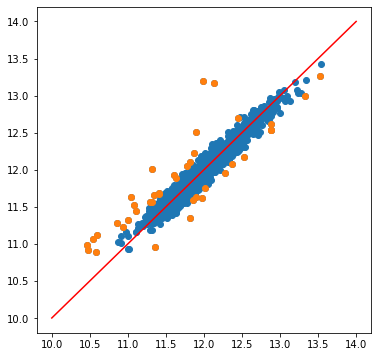

In [16]:
plt.figure(figsize=(6,6))
plt.scatter(y,y_pred)
plt.scatter(y.iloc[outliers1],y_pred[outliers1])
plt.plot(range(10,15),range(10,15),color='red')

###### ElasticNet

In [17]:
er = ElasticNet(alpha=0.001,l1_ratio=0.58)
er.fit(train_dummies,y)
np.sqrt(-cross_val_score(er,train_dummies,y,cv=5,scoring="neg_mean_squared_error")).mean()

0.135795652693992

In [18]:
y_pred = er.predict(train_dummies)
resid = y - y_pred
mean_resid = resid.mean()
std_resid = resid.std()
z = (resid-mean_resid) / std_resid
z = np.array(z)
outliers2 = np.where(abs(z) > abs(z).std()*3)[0]
outliers2

array([  30,   88,  142,  277,  328,  410,  457,  462,  495,  523,  533,
        581,  588,  628,  632,  666,  681,  688,  710,  711,  714,  728,
        738,  774,  812,  874,  898,  916,  968,  970, 1181, 1182, 1298,
       1324, 1383, 1423, 1432, 1453], dtype=int64)

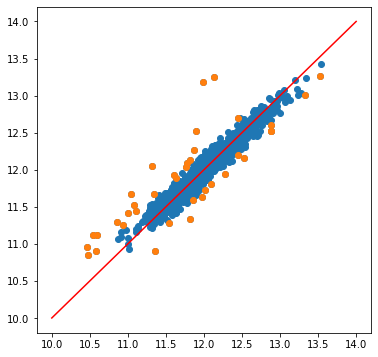

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(y,y_pred)
plt.scatter(y.iloc[outliers2],y_pred[outliers2])
plt.plot(range(10,15),range(10,15),color="red")

In [20]:
train = train.drop([30,88,142,277,308,328,365,410,438,457,462,495,523,533,581,588,628,632,
                    666,681,688,710,711,714,728,738,774,812,874,898,916,935,968,970,1062,
                    1181, 1182, 1298,1168,1170,1324,1383,1423,1432,1453])
y = train["SalePrice"]
y = np.log(y+1)
      

#### Data Modeling

In [21]:
train_dummies = pd.get_dummies(pd.concat((train.drop(["SalePrice","Id"],axis=1),
                                         test.drop(["Id"],axis=1)),axis=0)).iloc[:train.shape[0]]
test_dummies = pd.get_dummies(pd.concat((train.drop(["SalePrice","Id"],axis=1),
                                        test.drop(["Id"],axis=1)),axis=0)).iloc[train.shape[0]:]

##### GBDT

In [22]:
gbr = GradientBoostingRegressor(max_depth=4, n_estimators=150)
gbr.fit(train_dummies,y)
np.sqrt(-cross_val_score(gbr,train_dummies,y,cv=5,scoring="neg_mean_squared_error")).mean()

0.09902135063600251

##### XGB

In [24]:
xgbr = XGBRegressor(max_depth=5,n_estimators=400)
xgbr.fit(train_dummies,y)
np.sqrt(-cross_val_score(xgbr,train_dummies,y,cv=5,scoring="neg_mean_squared_error")).mean()

0.10458673777940379

##### Lasso

In [25]:
lsr = Lasso(alpha=0.00047)
lsr.fit(train_dummies,y)
np.sqrt(-cross_val_score(lsr,train_dummies,y,cv=5,scoring="neg_mean_squared_error")).mean()

0.08848066277878756

##### Ridge

In [26]:
rr = Ridge(alpha=13)
rr.fit(train_dummies,y)
np.sqrt(-cross_val_score(rr,train_dummies,y,cv=5,scoring="neg_mean_squared_error")).mean()

0.08897821690904305

#### Stacking and tuning

In [27]:
train_predict = 0.1*gbr.predict(train_dummies)+0.3*xgbr.predict(train_dummies)+0.3*lsr.predict(train_dummies)+0.3*rr.predict(train_dummies)

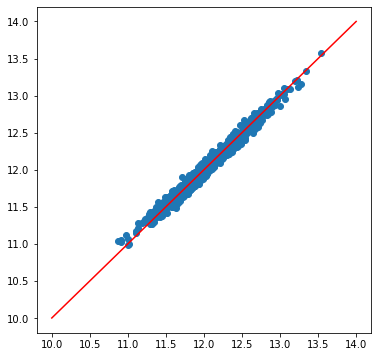

In [28]:
plt.figure(figsize=(6,6))
plt.scatter(y,train_predict)
plt.plot(range(10,15),range(10,15),color='red')

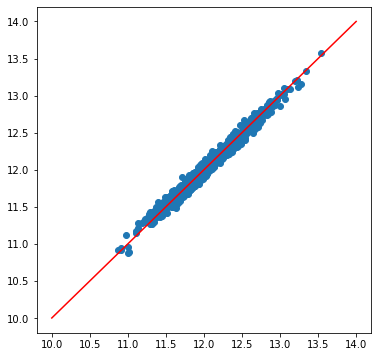

In [29]:
q1 = pd.DataFrame(train_predict).quantile(0.0042)
pre_df = pd.DataFrame(train_predict)
pre_df["SalePrice"] = train_predict
pre_df = pre_df[["SalePrice"]]
pre_df.loc[pre_df.SalePrice <= q1[0],"SalePrice"] = pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] *0.99
train_predict = np.array(pre_df.SalePrice)
plt.figure(figsize=(6,6))
plt.scatter(y,train_predict)
plt.plot(range(10,15),range(10,15),color='red')

In [30]:
test_predict = 0.1*gbr.predict(test_dummies)+0.3*xgbr.predict(test_dummies)+0.3*lsr.predict(test_dummies)+0.3*rr.predict(test_dummies)
q1 = pd.DataFrame(test_predict).quantile(0.0042)
pre_df = pd.DataFrame(test_predict)
pre_df["SalePrice"] = test_predict
pre_df = pre_df[["SalePrice"]]
pre_df.loc[pre_df.SalePrice <= q1[0],"SalePrice"] = pre_df.loc[pre_df.SalePrice <= q1[0],"SalePrice"]*0.96
test_predict = np.array(pre_df.SalePrice)
sample_submission["SalePrice"] = np.exp(test_predict)-1
sample_submission.to_csv("data.csv",index=False)